In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/us-retail-sales.csv')
df.head()

,Month,Clothing,Appliances,FoodAndBeverage,Automobiles,GeneralMerchandise,BuildingMaterials
0,1992-01,6938,3657,29589,26788,14996,8964
1,1992-02,7524,3490,28570,28203,16015,9023
2,1992-03,8475,3669,29682,31684,17984,10608
3,1992-04,9401,3527,30228,32547,18872,11630
4,1992-05,9558,3571,31677,32883,20037,12327


In [3]:
df['Month'] = pd.to_datetime(df['Month'])

In [5]:
df = df[['Month',"Clothing"]]
df = df[df.Month>=pd.to_datetime('2014-12-01')]

In [6]:
df['lag_1'] = df['Clothing'].shift(1)
df['lag_2'] = df['Clothing'].shift(2)
df['lead_1'] = df['Clothing'].shift(-1)

C:\Users\duclh3\AppData\Local\Temp\ipykernel_36044\1916190564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_1'] = df['Clothing'].shift(1)
C:\Users\duclh3\AppData\Local\Temp\ipykernel_36044\1916190564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_2'] = df['Clothing'].shift(2)
C:\Users\duclh3\AppData\Local\Temp\ipykernel_36044\1916190564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [8]:
df['Centered_MA'] = (df['Clothing'] + df['lead_1'] + df['lag_1'])/3

C:\Users\duclh3\AppData\Local\Temp\ipykernel_36044\1238535022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Centered_MA'] = (df['Clothing'] + df['lead_1'] + df['lag_1'])/3


In [10]:
df['Trailing_MA'] = (df['Clothing'] + df['lag_1'] + df['lag_2'])/3

In [11]:
df

,Month,Clothing,lag_1,lag_2,lead_1,Centered_MA,Trailing_MA
0,1992-01-01,6938,NaN,NaN,7524.0,NaN,NaN
1,1992-02-01,7524,6938.0,NaN,8475.0,7645.666667,NaN
2,1992-03-01,8475,7524.0,6938.0,9401.0,8466.666667,7645.666667
3,1992-04-01,9401,8475.0,7524.0,9558.0,9144.666667,8466.666667
4,1992-05-01,9558,9401.0,8475.0,9182.0,9380.333333,9144.666667
...,...,...,...,...,...,...,...
331,2019-08-01,23829,21742.0,21116.0,19567.0,21712.666667,22229.000000
332,2019-09-01,19567,23829.0,21742.0,21400.0,21598.666667,21712.666667
333,2019-10-01,21400,19567.0,23829.0,25170.0,22045.666667,21598.666667
334,2019-11-01,25170,21400.0,19567.0,35157.0,27242.333333,22045.666667


f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

<Axes: xlabel='Month', ylabel='Centered_MA'>

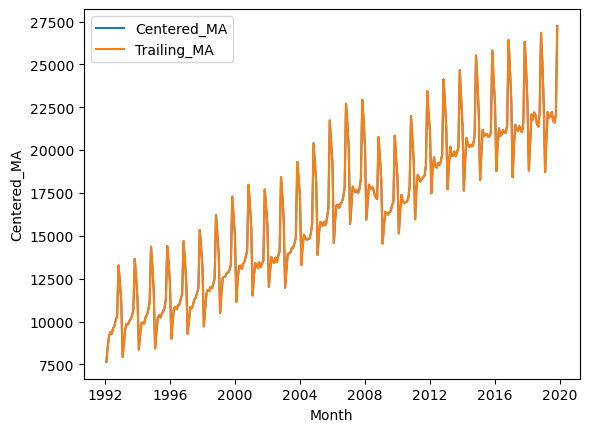

In [19]:
# sns.lineplot(x='Month', y='Clothing', data=df, label='original')
sns.lineplot(x='Month', y='Centered_MA', data=df, label='Centered_MA')
sns.lineplot(x='Month', y='Centered_MA', data=df, label='Trailing_MA')